# **Initialization**

In [19]:
import pandas as pd
# from textblob import TextBlob
import re
import spacy
from collections import Counter
# from google.colab import drive

 #### Mount google drive where the csv files are stored

In [20]:
# Mount Google Drive
# drive.mount('/content/drive', force_remount=True)

### Confirm if drive is mounted by listing the drive contents

In [21]:
# !ls "/content/drive/My Drive"

##### Read the CSV files into pandas DataFrames

In [22]:
# news_data = pd.read_csv('/content/drive/My Drive/all_news_data/data.csv')
# traffic_data = pd.read_csv('/content/drive/My Drive/all_news_data/traffic.csv')
# domains_location_data = pd.read_csv('/content/drive/My Drive/all_news_data/domains_location.csv')

In [115]:
news_data = pd.read_csv('../data/data.csv')
traffic_data = pd.read_csv('../data/traffic.csv')
domains_location_data = pd.read_csv('../data/domains_location.csv')

In [116]:
news_data.columns

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'full_content'],
      dtype='object')

In [117]:
news_data.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN


# **Data preprocessing**

In [118]:
# Function to preprocess source_name into source_id
def preprocess_source_id(source_name):
    # Convert to lowercase
    source_id = source_name.lower()
    # Replace spaces with hyphens
    source_id = source_id.replace(" ", "-")
    # Keep only alphanumeric characters, hyphens, brackets and full stops
    source_id = re.sub(r'[^\w\-.()]+', '', source_id)
    return source_id

# Apply the function to the source_name column to create the source_id column
news_data['source_id'] = news_data['source_name'].apply(preprocess_source_id)

In [119]:
# Preprocessing for author column missing values
news_data['author'].fillna('Unknown', inplace=True)

# Deal with full_content
news_data.dropna(subset=['full_content'], inplace=True)

# Since url_to_image is not important we can fill with placeholder
news_data['url_to_image'].fillna('http://example.com/placeholder.jpg', inplace=True)

# same with description column, use placeholder, unless otherwise important
news_data['description'].fillna('No description provided', inplace=True)

# Replace missing values in 'category' with 'Unknown'
news_data['category'].fillna('Unknown', inplace=True)

# Replace missing values in 'title' with 'No title provided'
news_data['title'].fillna('No title provided', inplace=True)

In [120]:
# Perform preprocessing and clean missing values on the domains_info dataset
domains_location_data.dropna(subset=['Country'], inplace=True)

### More Preprocessing, on date fields

In [121]:
# prompt: Using dataframe news_data: perform data preprocessing and cleaning

# Check for missing values
news_data.isnull().sum()

# Drop rows with missing values
news_data.dropna(inplace=True)

# Remove duplicate rows
news_data.drop_duplicates(inplace=True)

# Convert the 'published_at' column to datetime format
news_data['published_at'] = pd.to_datetime(news_data['published_at'], format='ISO8601')
# news_data['published_at'] = pd.to_datetime(news_data['published_at'])

# Extract the year from the 'published_at' column
news_data['year'] = news_data['published_at'].dt.year

# Group the data by year and calculate

ValueError: time data '2023-10-30 10:12:35.000000' does not match format 'ISO8601' (match)

In [ ]:
news_data.head()

## Check for any left missing values

In [122]:
missing_values_news_data = news_data.isnull().sum()
print(missing_values_news_data)

article_id      0
source_id       0
source_name     0
author          0
title           0
description     0
url             0
url_to_image    0
published_at    0
content         0
category        0
full_content    0
dtype: int64


In [123]:
missing_values_domains_location_data = domains_location_data.isnull().sum()
print(missing_values_domains_location_data)



SourceCommonName    0
location            0
Country             0
dtype: int64


In [124]:
missing_values_traffic_data = traffic_data.isnull().sum()
print(missing_values_traffic_data)

GlobalRank        0
TldRank           0
Domain            0
TLD               0
RefSubNets        0
RefIPs            0
IDN_Domain        0
IDN_TLD           0
PrevGlobalRank    0
PrevTldRank       0
PrevRefSubNets    0
PrevRefIPs        0
dtype: int64


In [125]:
domains_location_data.columns

Index(['SourceCommonName', 'location', 'Country'], dtype='object')

### Fix missing values

In [36]:
traffic_data.columns

Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')

In [37]:
news_data = news_data.dropna()
missing_values_news_data = news_data.isnull().sum()
print(missing_values_news_data)

article_id      0
source_id       0
source_name     0
author          0
title           0
description     0
url             0
url_to_image    0
published_at    0
content         0
category        0
full_content    0
dtype: int64


In [38]:
news_data.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,international-business-times,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
3,89545,the-indian-express,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
6,89551,al-jazeera-english,Al Jazeera English,Kaushik Raj,Pro-Israel rallies allowed in India but Palest...,"India, the first non-Arab country to recognise...",https://www.aljazeera.com/news/2023/10/25/pro-...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-25 09:58:17.000000,"New Delhi, India Israels relentless bombing of...",Nepal,"India, the first non-Arab country to recognise..."
7,89555,the-indian-express,The Indian Express,New York Times,No nation in the world is buying more planes t...,India's largest airlines have ordered nearly 1...,https://indianexpress.com/article/business/avi...,https://images.indianexpress.com/2023/11/igiai...,2023-11-02 05:48:58.000000,No nation in the world is buying as many airpl...,Nepal,Written by Alex Travelli and Hari Kumar No nat...
12,89563,the-times-of-india,The Times of India,Durgesh Nandan Jha,PM Hasina’s war on terror gets daughter India’...,India News: NEW DELHI: India preferred Banglad...,https://timesofindia.indiatimes.com/india/pm-h...,"https://static.toiimg.com/thumb/msid-47529300,...",2023-11-02 01:12:47.000000,Ranked! Worlds most loved landmarks; Taj Mahal...,Nepal,NEW DELHI: India preferred Bangladesh over Nep...


### Check outliers

In [39]:
# Check for missing values
news_data.isnull().all()

article_id      False
source_id       False
source_name     False
author          False
title           False
description     False
url             False
url_to_image    False
published_at    False
content         False
category        False
full_content    False
dtype: bool

In [40]:
len(news_data)

54889

<Axes: >

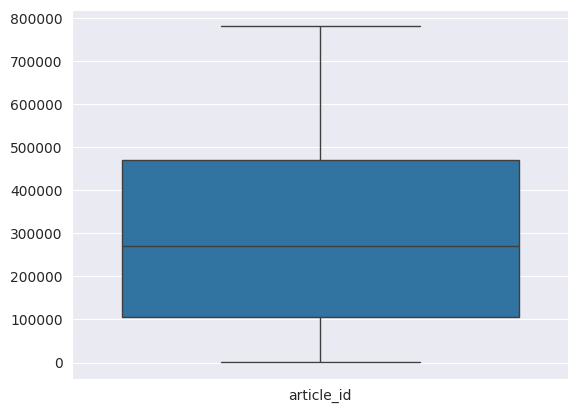

In [41]:
import seaborn as sns

sns.boxplot(data=news_data)

In [42]:
domains_location_data.isnull().all()

SourceCommonName    False
location            False
Country             False
dtype: bool

In [43]:
domains_location_data.empty

False

<Axes: >

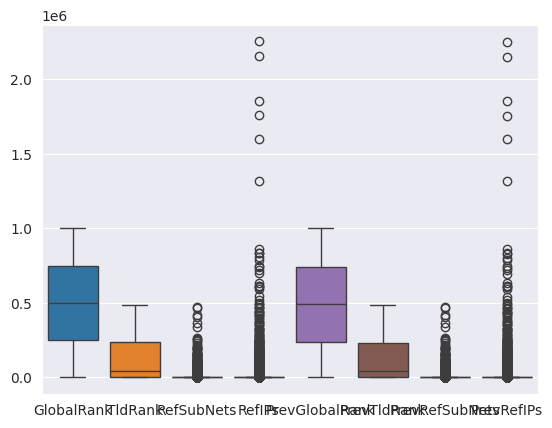

In [44]:

sns.boxplot(data=traffic_data)

Clean the data:
* Remove duplicate rows:

## **Exploratory Data Analysis (EDA)**

In [45]:
news_data.columns

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'full_content'],
      dtype='object')

In [46]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54889 entries, 0 to 105374
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_id    54889 non-null  int64 
 1   source_id     54889 non-null  object
 2   source_name   54889 non-null  object
 3   author        54889 non-null  object
 4   title         54889 non-null  object
 5   description   54889 non-null  object
 6   url           54889 non-null  object
 7   url_to_image  54889 non-null  object
 8   published_at  54889 non-null  object
 9   content       54889 non-null  object
 10  category      54889 non-null  object
 11  full_content  54889 non-null  object
dtypes: int64(1), object(11)
memory usage: 5.4+ MB


In [47]:
news_data.describe()

,article_id
count,54889.000000
mean,305940.568019
std,220864.360813
min,418.000000
25%,105821.000000
50%,271035.000000
75%,469868.000000
max,781308.000000


In [48]:
top_N = 10

In [49]:
"""Get the top N countries with the highest number of articles written about them"""
# !pip install spacy-transformers

# Load the SpaCy model
import en_core_web_sm
nlp = en_core_web_sm.load()

# nlp.max_length = 3500000  # Increase the maximum length limit

# Concantenating all the news articles into a single string
all_articles = " ".join(news_data['title'].dropna())

# Split the text into chunks of 1,000,000 characters
chunks = [all_articles[i:i + 1000000] for i in range(0, len(all_articles), 1000000)]


# Initialize a Counter object to store the country counts
country_counts = Counter()

# Process each chunk separately
for chunk in chunks:
    doc = nlp(chunk)
    # Extracting the countries mentioned in the articles
    countries = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    # Update the country counts
    country_counts.update(countries)

# Print the top N countries
print(country_counts.most_common(top_N))

# Print the bottom N countries
print(country_counts.most_common()[:-top_N-1:-1])

[('Israel', 1382), ('US', 1168), ('Gaza', 1144), ('India', 1024), ('China', 706), ('Russia', 594), ('Ukraine', 538), ('UK', 385), ('U.S.', 261), ('Australia', 261)]
[('West Village', 1), ('Homecoming', 1), ('Clear', 1), ('Europe Country', 1), ('Videos', 1), ('Berkshire', 1), ('Firms', 1), ('Tasmania', 1), ('Benelux', 1), ('Ukraine Citizens', 1)]


In [50]:
def get_websites_reporting_on_regions(news_data, regions):
    """Get the websites that reported about specific regions"""

    # Load the SpaCy model
    nlp = spacy.load("en_core_web_sm")

    # Initialize a dictionary to store the results
    region_counts = {region: Counter() for region in regions}

    # Process each article
    for _, row in news_data.iterrows():
        doc = nlp(row['title'])

        # Extract country names
        countries = [ent.text for ent in doc.ents if ent.label_ == 'GPE']

        # Check if the country belongs to one of the regions
        for country in countries:
            for region, region_countries in regions.items():
                if country in region_countries:
                    region_counts[region][row['source_name']] += 1

    return region_counts

In [51]:
# Define the regions

AFRICA = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
EU = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
MIDDLE_EAST = ['Bahrain', 'Cyprus', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen']

regions = {
    'Africa': AFRICA,
    'EU': EU,
    'Middle East': MIDDLE_EAST,
    'US': ['United States'],
    'China': ['China'],
    'Russia': ['Russia'],
    'Ukraine': ['Ukraine']
}

In [52]:
# Get the websites that reported about the specified regions
region_counts = get_websites_reporting_on_regions(news_data, regions)

# Print the results
for region, counts in region_counts.items():
    print(f"Websites that reported about {region}:")
    print(counts.most_common(10))
    print()

Websites that reported about Africa:
[('The Punch', 146), ('Globalsecurity.org', 134), ('BBC News', 104), ('Al Jazeera English', 102), ('ABC News', 85), ('The Times of India', 78), ('RT', 61), ('Marketscreener.com', 52), ('International Business Times', 35), ('CNA', 23)]

Websites that reported about EU:
[('Globalsecurity.org', 130), ('ABC News', 103), ('The Times of India', 100), ('Euronews', 85), ('CNA', 75), ('Al Jazeera English', 71), ('RT', 56), ('BBC News', 56), ('GlobeNewswire', 55), ('International Business Times', 53)]

Websites that reported about Middle East:
[('Globalsecurity.org', 581), ('Al Jazeera English', 542), ('The Times of India', 239), ('Business Insider', 185), ('BBC News', 142), ('ABC News', 140), ('RT', 131), ('International Business Times', 105), ('NPR', 105), ('CNA', 47)]

Websites that reported about US:
[('GlobeNewswire', 6), ('Globalsecurity.org', 5), ('ETF Daily News', 2), ('ABC News', 1), ('International Business Times', 1), ('The Times of India', 1)]

We

#  top 10 and bottom 10 websites by mean sentiment

In [54]:
from textblob import TextBlob

def calculate_sentiment(text):
    """Calculate sentiment score using TextBlob"""
    return TextBlob(text).sentiment.polarity

In [55]:
def sentiment_statistics(news_data):
    """Calculate sentiment statistics for each website"""
    # Calculate sentiment scores
    news_data['sentiment'] = news_data['content'].apply(calculate_sentiment)

    # Create columns for positive, neutral, and negative sentiment counts
    news_data['positive_sentiment'] = (news_data['sentiment'] > 0).astype(int)
    news_data['neutral_sentiment'] = (news_data['sentiment'] == 0).astype(int)
    news_data['negative_sentiment'] = (news_data['sentiment'] < 0).astype(int)

    # Group by 'source_name' and calculate mean, median, variance, and sentiment counts
    grouped = news_data.groupby('source_name')
    mean_sentiment = grouped['sentiment'].mean()
    median_sentiment = grouped['sentiment'].median()
    variance_sentiment = grouped['sentiment'].var()
    positive_sentiment = grouped['positive_sentiment'].sum()
    neutral_sentiment = grouped['neutral_sentiment'].sum()
    negative_sentiment = grouped['negative_sentiment'].sum()

    # Return the results as a DataFrame
    return pd.DataFrame({
        'mean_sentiment': mean_sentiment,
        'median_sentiment': median_sentiment,
        'variance_sentiment': variance_sentiment,
        'positive_sentiment': positive_sentiment,
        'neutral_sentiment': neutral_sentiment,
        'negative_sentiment': negative_sentiment
    })

In [56]:
news_data.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,international-business-times,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
3,89545,the-indian-express,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
6,89551,al-jazeera-english,Al Jazeera English,Kaushik Raj,Pro-Israel rallies allowed in India but Palest...,"India, the first non-Arab country to recognise...",https://www.aljazeera.com/news/2023/10/25/pro-...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-25 09:58:17.000000,"New Delhi, India Israels relentless bombing of...",Nepal,"India, the first non-Arab country to recognise..."
7,89555,the-indian-express,The Indian Express,New York Times,No nation in the world is buying more planes t...,India's largest airlines have ordered nearly 1...,https://indianexpress.com/article/business/avi...,https://images.indianexpress.com/2023/11/igiai...,2023-11-02 05:48:58.000000,No nation in the world is buying as many airpl...,Nepal,Written by Alex Travelli and Hari Kumar No nat...
12,89563,the-times-of-india,The Times of India,Durgesh Nandan Jha,PM Hasina’s war on terror gets daughter India’...,India News: NEW DELHI: India preferred Banglad...,https://timesofindia.indiatimes.com/india/pm-h...,"https://static.toiimg.com/thumb/msid-47529300,...",2023-11-02 01:12:47.000000,Ranked! Worlds most loved landmarks; Taj Mahal...,Nepal,NEW DELHI: India preferred Bangladesh over Nep...


In [0]:
# Calculate sentiment statistics
sentiment_stats2 = sentiment_statistics(news_data)

# Sort the DataFrame by mean sentiment and get the top 10 and bottom 10 websites
top_10_websites = sentiment_stats2.sort_values(by='mean_sentiment', ascending=False).head(10)
bottom_10_websites = sentiment_stats2.sort_values(by='mean_sentiment', ascending=True).head(10)

# Print the top 10 and bottom 10 websites
print("Top 10 websites by mean sentiment:")
print(top_10_websites)
print("\nBottom 10 websites by mean sentiment:")
print(bottom_10_websites)

### Median sentiment, top and bottom 10

In [0]:
# Sort the DataFrame by median sentiment and get the top 10 and bottom 10 websites
top_10_websites_median = sentiment_stats.sort_values(by='median_sentiment', ascending=False).head(10)
bottom_10_websites_median = sentiment_stats.sort_values(by='median_sentiment', ascending=True).head(10)

# Print the top 10 and bottom 10 websites by median sentiment
print("\nTop 10 websites by median sentiment:")
print(top_10_websites_median)
print("\nBottom 10 websites by median sentiment:")
print(bottom_10_websites_median)

# Calculate sentiment statistics and save to a DataFrame

In [58]:

# Apply function to calculate sentiment
news_data['title_sentiment'] = news_data['title'].apply(calculate_sentiment)

# Group by source_name and calculate mean sentiment
title_sentiment_stats = news_data.groupby('source_name')['title_sentiment'].mean().reset_index()

In [59]:
# Print the DataFrame
print(title_sentiment_stats)

                     source_name  title_sentiment
0                       ABC News         0.032829
1             Al Jazeera English         0.013220
2    AllAfrica - Top Africa News        -0.001599
3                Android Central         0.161627
4                       BBC News        -0.001080
5                    Boing Boing         0.060459
6               Business Insider         0.046616
7                            CNA         0.052112
8                            CNN         0.016447
9                       Deadline         0.062693
10                Digital Trends         0.206723
11                ETF Daily News         0.015479
12                      Euronews         0.039194
13                        Forbes         0.113641
14                   Gizmodo.com         0.057141
15            Globalsecurity.org         0.010380
16                 GlobeNewswire         0.061334
17  International Business Times         0.019454
18            Marketscreener.com         0.038020


In [61]:
import altair as alt

# Assuming the DataFrame is named as 'title_sentiment_stats'
chart = alt.Chart(title_sentiment_stats).mark_bar().encode(
    x='source_name:N',
    y='title_sentiment:Q',
    color=alt.condition(
        alt.datum.title_sentiment > 0,
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
).properties(width=600)

chart.display()

alt.Chart(...)

# Compare metadata across sites

## Compare similarity of raw message length across sites and their distribution



In [ ]:
def calculate_message_length(news_data):
    """Calculate the length of raw messages for each article"""
    news_data['message_length'] = news_data['content'].apply(len)
    return news_data

In [ ]:
# Calculate message length and title word count
news_data = calculate_message_length(news_data)
news_data = calculate_title_word_count(news_data)

# Group by 'source_name' and calculate descriptive statistics for message length
message_length_stats = news_data.groupby('source_name')['message_length'].describe()

# Print the descriptive statistics
print("Message length statistics:")
print(message_length_stats)

## Compare similarity of number of words in the title across sites and their distribution

In [ ]:

def calculate_title_word_count(news_data):
    """Calculate the number of words in the title for each article"""
    news_data['title_word_count'] = news_data['title'].apply(lambda x: len(str(x).split()))
    return news_data

In [ ]:
# Group by 'source_name' and calculate descriptive statistics title word count
title_word_count_stats = news_data.groupby('source_name')['title_word_count'].describe()

In [ ]:
# Print the descriptive statistics
print("\nTitle word count statistics:")
print(title_word_count_stats)

#### Manually create dictionary mapping for news websites with source names to their domains

In [62]:
# Manually create a dictionary mapping source names to their domains
source_domain_mapping = {
    'ETF Daily News': 'etfdailynews.com',
    'The Times of India': 'timesofindia.indiatimes.com',
    'GlobeNewswire': 'globenewswire.com',
    'Globalsecurity.org': 'globalsecurity.org',
    'Forbes': 'forbes.com',
    'BBC News': 'bbc.co.uk',
    'ABC News': 'abcnews.go.com',
    'Business Insider': 'businessinsider.com',
    'The Punch': 'punchng.com',
    'Al Jazeera English': 'aljazeera.com',
    'Marketscreener.com': 'marketscreener.com',
    'Phys.Org': 'phys.org',
    'International Business Times': 'ibtimes.com',
    'The Indian Express': 'indianexpress.com',
    'RT': 'rt.com',
    'NPR': 'npr.org',
    'Deadline': 'deadline.com',
    'Digital Trends': 'digitaltrends.com',
    'CNA': 'channelnewsasia.com',
    'Boing Boing': 'boingboing.net',
    'Time': 'time.com',
    'Android Central': 'androidcentral.com',
    'Gizmodo.com': 'gizmodo.com',
    'ReadWrite': 'readwrite.com',
    'Euronews': 'euronews.com',
    'Wired': 'wired.com',
    'CNN': 'cnn.com',
    'The Verge': 'theverge.com',
    'AllAfrica - Top Africa News': 'allafrica.com'
}

In [63]:
# Add a new column 'url' to the DataFrame
news_data['url'] = news_data['source_name'].map(source_domain_mapping)

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate total number of reports by each website
total_reports = news_data['source_name'].value_counts().reset_index()
total_reports.columns = ['source_name', 'total_reports']

# Step 2: Add a new column 'url' to the DataFrame
total_reports['url'] = total_reports['source_name'].map(source_domain_mapping)

In [72]:
print(total_reports)

                     source_name  total_reports                          url
0                 ETF Daily News          15039             etfdailynews.com
1             The Times of India           7012  timesofindia.indiatimes.com
2                  GlobeNewswire           5122            globenewswire.com
3             Globalsecurity.org           2904           globalsecurity.org
4                         Forbes           2577                   forbes.com
5                       BBC News           2039                    bbc.co.uk
6                       ABC News           2006               abcnews.go.com
7               Business Insider           1979          businessinsider.com
8                      The Punch           1750                  punchng.com
9             Al Jazeera English           1588                aljazeera.com
10            Marketscreener.com           1439           marketscreener.com
11                      Phys.Org           1238                     phys.org

In [81]:
## Drop irrelevant columns in the traffic_data DataFrame

In [90]:
# Assuming 'column1', 'column2' are the irrelevant columns
domain_global_rank = traffic_data.drop(['TldRank', 'TLD', 'IDN_Domain', 'PrevGlobalRank','RefSubNets', 'IDN_TLD', 'RefIPs', 'PrevTldRank', 'PrevRefSubNets', 'PrevRefIPs'], axis=1)

In [92]:
domain_global_rank.head(10)

,GlobalRank,Domain
0,1,google.com
1,2,facebook.com
2,3,youtube.com
3,4,twitter.com
4,5,instagram.com
5,6,linkedin.com
6,7,apple.com
7,8,microsoft.com
8,9,googletagmanager.com
9,10,wikipedia.org


# Impact of frequent news reporting and sentiment to the website’s global ranking. 2D Scatter plot graph

In [102]:
# Merge total_reports with traffic_data on 'url'
merged_data = pd.merge(total_reports, domain_global_rank, left_on='url', right_on='Domain')


In [103]:

# Merge merged_data with title_sentiment_stats on 'source_name'
final_data = pd.merge(merged_data, title_sentiment_stats, on='source_name')

In [107]:
final_data.head(30)

,source_name,total_reports,url,GlobalRank,Domain,title_sentiment
0,ETF Daily News,15039,etfdailynews.com,64211,etfdailynews.com,0.015479
1,The Times of India,7012,timesofindia.indiatimes.com,546,timesofindia.indiatimes.com,0.048196
2,GlobeNewswire,5122,globenewswire.com,492,globenewswire.com,0.061334
3,Globalsecurity.org,2904,globalsecurity.org,3549,globalsecurity.org,0.010380
4,Forbes,2577,forbes.com,64,forbes.com,0.113641
5,BBC News,2039,bbc.co.uk,87,bbc.co.uk,-0.001080
6,Business Insider,1979,businessinsider.com,115,businessinsider.com,0.046616
7,The Punch,1750,punchng.com,6570,punchng.com,0.023048
8,Al Jazeera English,1588,aljazeera.com,516,aljazeera.com,0.013220
9,Marketscreener.com,1439,marketscreener.com,3925,marketscreener.com,0.038020


In [70]:
# Merge total_reports with traffic_data on 'url'
merged_data = pd.merge(total_reports, traffic_data, left_on='url', right_on='Domain')


# Scatter plot using Altair

## First scatter plot with sentiment and global rank

In [109]:
import altair as alt

# Filter the DataFrame
final_data_top_10000 = final_data[final_data['GlobalRank'] <= 10000]

# Create a scatter plot
scatter = alt.Chart(final_data_top_10000).mark_circle(size=60).encode(
    x='title_sentiment:Q',
    y='GlobalRank:Q',
    color=alt.Color('title_sentiment:Q', scale=alt.Scale(scheme='blueorange')),
    tooltip=['Domain:N', 'title_sentiment:Q', 'GlobalRank:Q']
).properties(
    width=600,
    height=400,
    title='Impact of Sentiment on Website\'s Global Ranking'
)

scatter.display()

alt.Chart(...)

## Second scatter plot with total reports, sentiment and global rank

In [106]:
import altair as alt

# Filter the DataFrame
final_data_top_10000 = final_data[final_data['GlobalRank'] <= 10000]

# Create a scatter plot
scatter = alt.Chart(final_data_top_10000).mark_circle(size=60).encode(
    x='total_reports:Q',
    y='GlobalRank:Q',
    color=alt.Color('title_sentiment:Q', scale=alt.Scale(scheme='blueorange')),
    tooltip=['Domain:N', 'total_reports:Q', 'GlobalRank:Q', 'title_sentiment:Q']
).properties(
    width=600,
    height=400,
    title='Impact of Frequent News Reporting and Sentiment on Website\'s Global Ranking'
)

scatter.display()

alt.Chart(...)

# Scatter plot using Seaborn

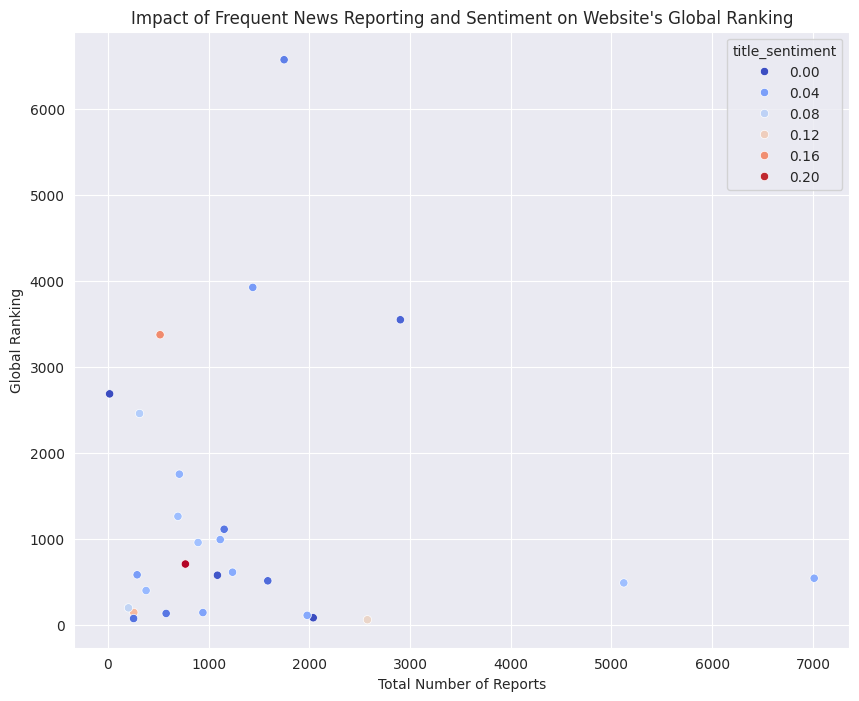

In [99]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=final_data_top_10000, x='total_reports', y='GlobalRank', hue='title_sentiment', palette='coolwarm')
plt.title('Impact of Frequent News Reporting and Sentiment on Website\'s Global Ranking')
plt.xlabel('Total Number of Reports')
plt.ylabel('Global Ranking')
plt.show()

# A choropleth map showing the distribution of news articles by country

In [ ]:
# Extract the country from the 'Country' column in the domains_location_data DataFrame
domains_location_data['Country'] = domains_location_data['Country'].str.split(',').str[0]

import spacy

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

def extract_country_from_title(title):
    doc = nlp(title)
    countries = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    return ', '.join(countries)

# Apply the function to the 'title' column
news_data['Country'] = news_data['title'].apply(extract_country_from_title)


In [110]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculate the number of articles by country
articles_by_country = news_data['Country'].value_counts().reset_index()
articles_by_country.columns = ['Country', 'Number of Articles']

# Merge the world map with the articles by country
world = world.merge(articles_by_country, left_on='name', right_on='Country')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Number of Articles', ax=ax, legend=True,
           legend_kwds={'label': "Number of Articles by Country",
                        'orientation': "horizontal"})
plt.title('Distribution of News Articles by Country')
plt.show()


/tmp/ipykernel_91957/522724341.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


KeyError: 'Country'